<a href="https://colab.research.google.com/github/raghavdw/data_science_basics/blob/main/Product_Segmentation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product Segmentation

In [4]:
!pip install yellowbrick

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_file = "https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/clustering/beer.csv"

In [8]:
beer_df = pd.read_csv( data_file )

In [9]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Kronenbourg,170,7,5.2,0.73
3,Heineken,152,11,5.0,0.77
4,Old_Milwaukee,145,23,4.6,0.28
5,Augsberger,175,24,5.5,0.40
6,Srohs_Bohemian_Style,149,27,4.7,0.42
7,Miller_Lite,99,10,4.3,0.43
8,Budweiser_Light,113,8,3.7,0.40
9,Coors,140,18,4.6,0.44


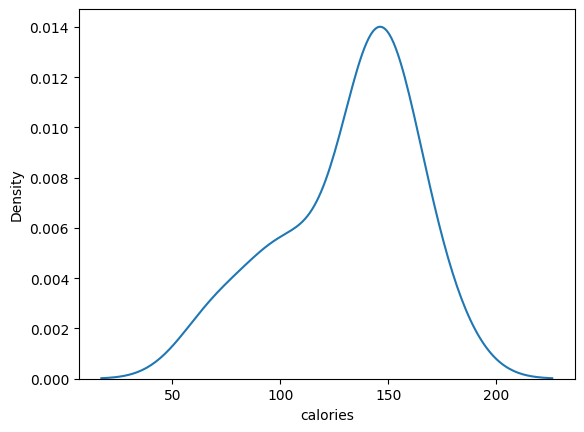

In [10]:
sn.kdeplot(beer_df.calories);

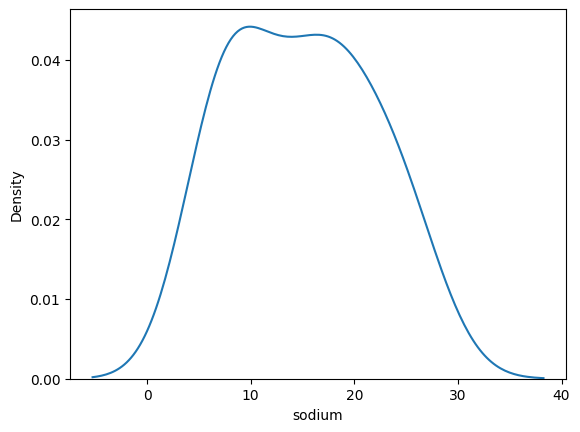

In [11]:
sn.kdeplot(beer_df.sodium);

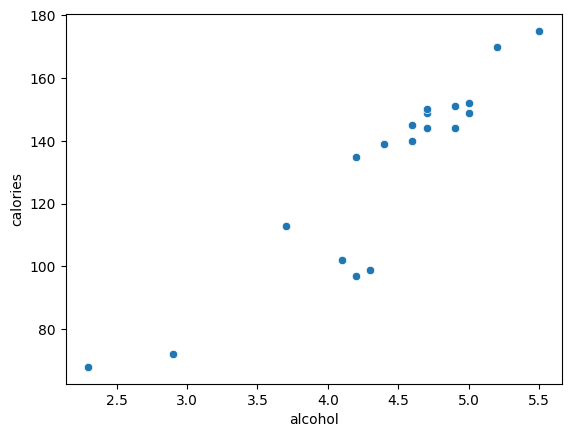

In [12]:
sn.scatterplot(data = beer_df,
               x = 'alcohol',
               y = 'calories');

## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

In [14]:
scaled_beer_df = pd.DataFrame(scaled_beer_df,
                              columns = ['calories',
                                         'sodium',
                                         'alcohol',
                                         'cost'])

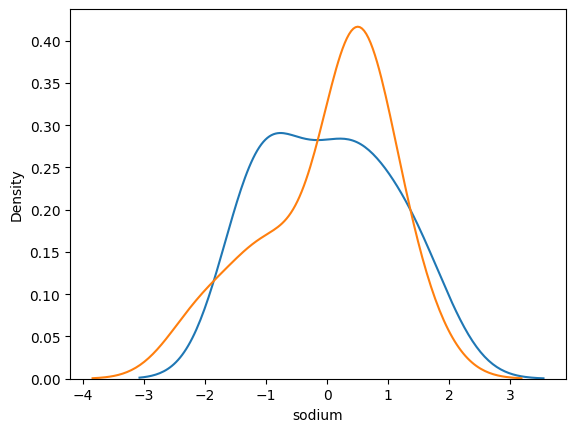

In [15]:
sn.kdeplot(scaled_beer_df.sodium);
sn.kdeplot(scaled_beer_df.calories);

## How many clusters exist?

#### Using Dendrogram

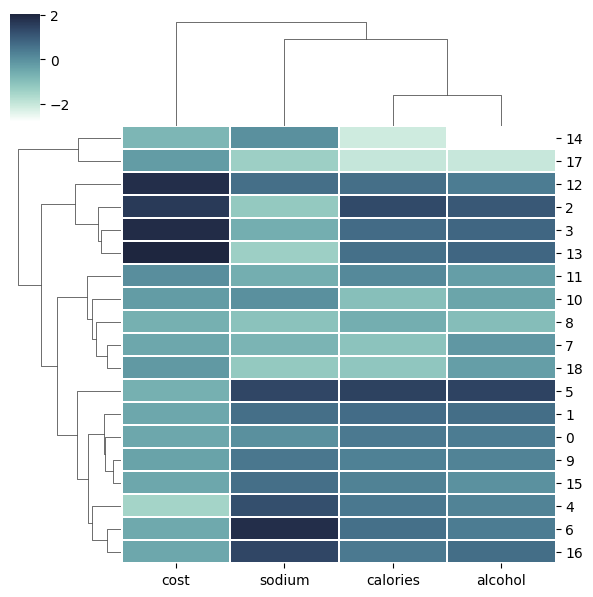

In [16]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df,
              cmap=cmap,
              linewidths=.2,
              figsize = (6,6) );

In [17]:
beer_df.iloc[[9,15]]

,name,calories,sodium,alcohol,cost
9,Coors,140,18,4.6,0.44
15,Hamms,139,19,4.4,0.43


In [18]:
beer_df.iloc[[16,14]]

,name,calories,sodium,alcohol,cost
16,Heilemans_Old_Style,144,24,4.9,0.43
14,Pabst_Extra_Light,68,15,2.3,0.38


In [19]:
from sklearn.cluster import KMeans

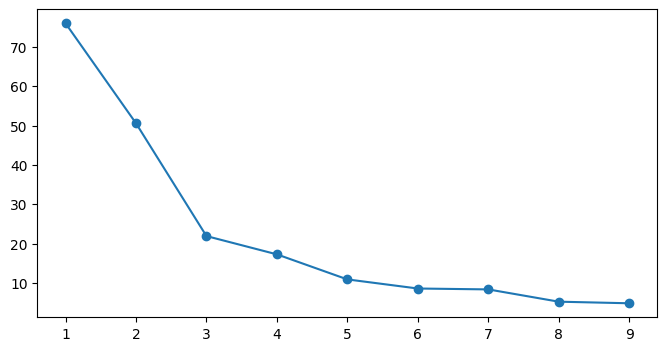

In [20]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
#cluster_errors
plt.plot( cluster_range, cluster_errors, marker = "o" );

## Evaluating the quality of cluster using Silhouette score

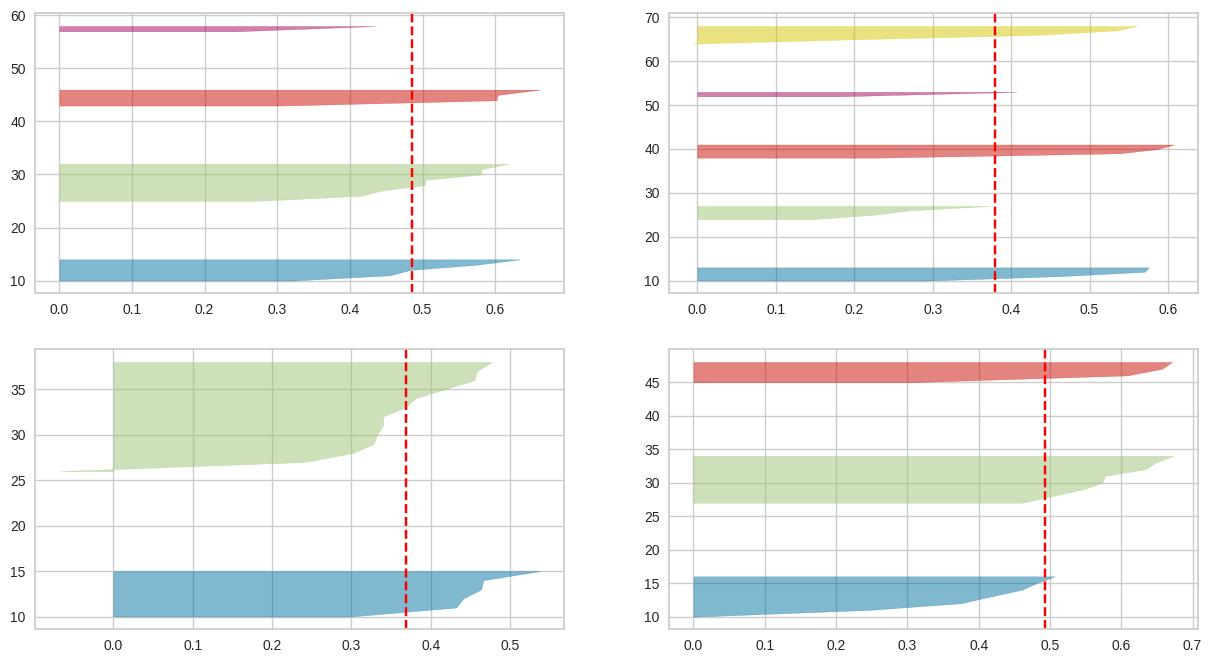

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [2, 3, 4, 5]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(scaled_beer_df)

#### Rescaling the dataset

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

#### Creating 3 Clusters

We will set k to 3 for running *KMeans* algorithm and create a new column *clusterid* in *beer_df* to capture the cluster number it is assigned to.

In [24]:
k = 4

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

In [25]:
clusters.labels_

array([1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 3, 1, 1, 3, 0],
      dtype=int32)

## Understanding the clusters

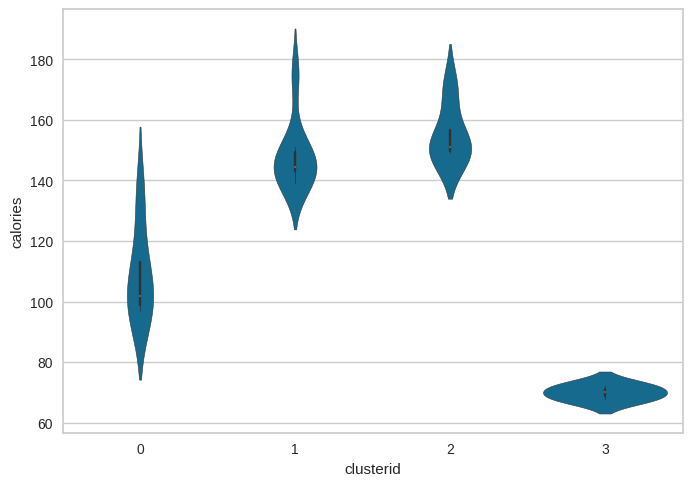

In [26]:
sn.violinplot(data = beer_df,
              y = 'calories',
              x = 'clusterid');

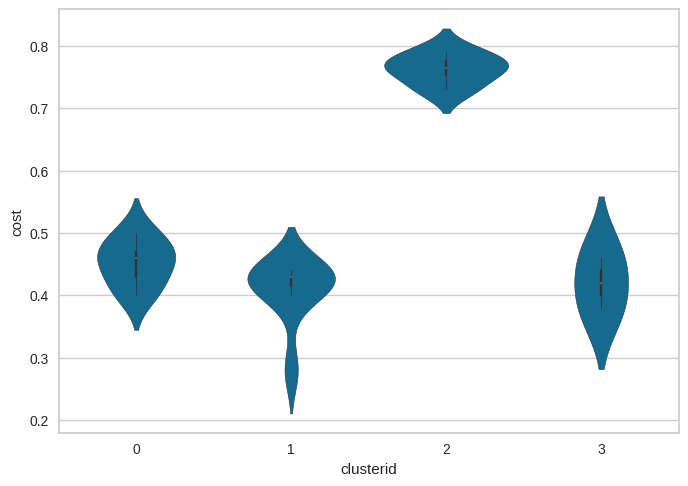

In [27]:
sn.violinplot(data = beer_df,
              y = 'cost',
              x = 'clusterid');

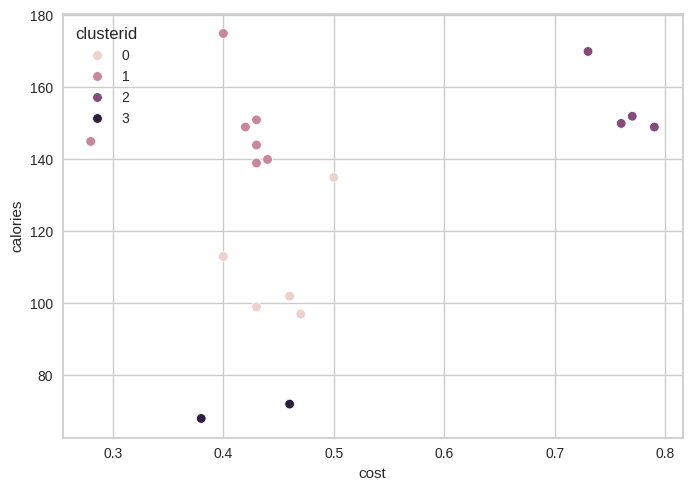

In [28]:
sn.scatterplot(data = beer_df,
               x = 'cost',
               y = 'calories',
               hue = 'clusterid');

#### Cluster 0

In [29]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
7,Miller_Lite,99,10,4.3,0.43,0
8,Budweiser_Light,113,8,3.7,0.40,0
10,Coors_Light,102,15,4.1,0.46,0
11,Michelob_Light,135,11,4.2,0.50,0
18,Schlitz_Light,97,7,4.2,0.47,0


#### Cluster 1

In [30]:
beer_df[beer_df.clusterid == 1].describe()

,calories,sodium,alcohol,cost,clusterid
count,8.000000,8.00000,8.000000,8.000000,8.0
mean,148.375000,21.12500,4.787500,0.407500,1.0
std,11.488348,3.97986,0.331393,0.052847,0.0
min,139.000000,15.00000,4.400000,0.280000,1.0
25%,143.000000,18.75000,4.600000,0.415000,1.0
50%,144.500000,21.00000,4.700000,0.430000,1.0
75%,149.500000,24.00000,4.900000,0.430000,1.0
max,175.000000,27.00000,5.500000,0.440000,1.0


#### Cluster 2

In [31]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
2,Kronenbourg,170,7,5.2,0.73,2
3,Heineken,152,11,5.0,0.77,2
12,Becks,150,19,4.7,0.76,2
13,Kirin,149,6,5.0,0.79,2


#### Cluster 3

In [32]:
beer_df[beer_df.clusterid == 3]

,name,calories,sodium,alcohol,cost,clusterid
14,Pabst_Extra_Light,68,15,2.3,0.38,3
17,Olympia_Goled_Light,72,6,2.9,0.46,3


# Evaluating Cluster Performane

## Calinski-Harabasz Index

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
cluster_range = range( 3, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(scaled_beer_df, clusters.labels_)}" )

n_cluster: 3 - CH Score: 21.2552193374943
n_cluster: 4 - CH Score: 21.743107578544173
n_cluster: 5 - CH Score: 17.550587981500996


## Davies-Bouldin Index

In [35]:
from sklearn.metrics import davies_bouldin_score

In [36]:
cluster_range = range( 3, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  print(f"n_cluster: {num_clusters} - CH Score: {davies_bouldin_score(scaled_beer_df, clusters.labels_)}" )

n_cluster: 3 - CH Score: 0.6751067972228676
n_cluster: 4 - CH Score: 0.6743792463352624
n_cluster: 5 - CH Score: 0.7493998985019992


# Hierarchical Clustering

Cluster method:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

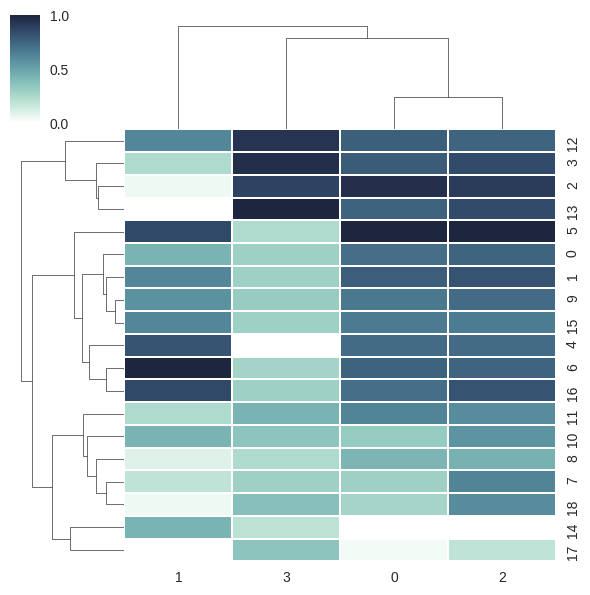

In [37]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df,
              cmap=cmap,
              linewidths=.2,
              figsize = (6,6) );

In [38]:
from sklearn.cluster import AgglomerativeClustering

Try different metric and linkage

- metric: “euclidean”, “manhattan”, “cosine”, "minkowski"
- linkage: single, complete, ward, average

In [39]:
AgglomerativeClustering?

In [40]:
h_cluster = AgglomerativeClustering(n_clusters = 4,
                                    metric = 'euclidean',
                                    linkage = 'complete',
                                    compute_distances = True)

In [41]:
#h_cluster = AgglomerativeClustering(n_clusters = 4,
#                                    metric = 'manhattan',
#                                    linkage = 'complete')

In [42]:
h_cluster.fit(scaled_beer_df)

AgglomerativeClustering(compute_distances=True, linkage='complete',
                        n_clusters=4)

In [43]:
h_cluster.labels_

array([2, 2, 0, 0, 2, 2, 2, 3, 3, 2, 3, 3, 0, 0, 1, 2, 2, 1, 3])

In [44]:
beer_df['hcluster_clusterid'] = h_cluster.labels_

In [45]:
beer_df.sort_values('hcluster_clusterid')

,name,calories,sodium,alcohol,cost,clusterid,hcluster_clusterid
2,Kronenbourg,170,7,5.2,0.73,2,0
3,Heineken,152,11,5.0,0.77,2,0
13,Kirin,149,6,5.0,0.79,2,0
12,Becks,150,19,4.7,0.76,2,0
14,Pabst_Extra_Light,68,15,2.3,0.38,3,1
17,Olympia_Goled_Light,72,6,2.9,0.46,3,1
0,Budweiser,144,15,4.7,0.43,1,2
16,Heilemans_Old_Style,144,24,4.9,0.43,1,2
15,Hamms,139,19,4.4,0.43,1,2
9,Coors,140,18,4.6,0.44,1,2


In [46]:
h_cluster.n_leaves_

19

In [47]:
h_cluster.children_

array([[ 9, 15],
       [ 6, 16],
       [ 7, 18],
       [ 1, 19],
       [ 0, 22],
       [ 2, 13],
       [ 8, 21],
       [ 3, 24],
       [ 4, 20],
       [10, 11],
       [25, 28],
       [ 5, 27],
       [14, 17],
       [23, 30],
       [12, 26],
       [29, 31],
       [32, 33],
       [34, 35]])

In [48]:
h_cluster.distances_

array([0.08152076, 0.16395877, 0.16698976, 0.19233195, 0.21737948,
       0.24193657, 0.26053901, 0.27320015, 0.33765497, 0.37219175,
       0.40726642, 0.46404951, 0.49480617, 0.57755618, 0.62893288,
       0.91447811, 1.29319422, 1.53170236])

# HDBScan Clustering

In [101]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039298 sha256=0fc7da84246a33231210763886f943a320e40d3e8ab2ca9e4dc972dee853f865
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [106]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [49]:
from sklearn.cluster import HDBSCAN

In [50]:
hdbscan = HDBSCAN(min_cluster_size=2)

In [51]:
hdbscan.fit(scaled_beer_df)

HDBSCAN(min_cluster_size=2)

In [52]:
hdbscan.labels_

array([ 2,  2,  0,  0, -1, -1,  3,  1,  1,  2,  1, -1,  0,  0, -1,  2,  3,
       -1,  1])

In [53]:
beer_df['hdbscan_clusterid'] = hdbscan.labels_

In [54]:
beer_df[beer_df.hdbscan_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,hcluster_clusterid,hdbscan_clusterid
2,Kronenbourg,170,7,5.2,0.73,2,0,0
3,Heineken,152,11,5.0,0.77,2,0,0
12,Becks,150,19,4.7,0.76,2,0,0
13,Kirin,149,6,5.0,0.79,2,0,0


In [55]:
beer_df[beer_df.hdbscan_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,hcluster_clusterid,hdbscan_clusterid
7,Miller_Lite,99,10,4.3,0.43,0,3,1
8,Budweiser_Light,113,8,3.7,0.40,0,3,1
10,Coors_Light,102,15,4.1,0.46,0,3,1
18,Schlitz_Light,97,7,4.2,0.47,0,3,1


In [56]:
beer_df[beer_df.hdbscan_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,hcluster_clusterid,hdbscan_clusterid
0,Budweiser,144,15,4.7,0.43,1,2,2
1,Schlitz,151,19,4.9,0.43,1,2,2
9,Coors,140,18,4.6,0.44,1,2,2
15,Hamms,139,19,4.4,0.43,1,2,2


In [57]:
beer_df[beer_df.hdbscan_clusterid == 3]

,name,calories,sodium,alcohol,cost,clusterid,hcluster_clusterid,hdbscan_clusterid
6,Srohs_Bohemian_Style,149,27,4.7,0.42,1,2,3
16,Heilemans_Old_Style,144,24,4.9,0.43,1,2,3


In [58]:
beer_df[beer_df.hdbscan_clusterid == -1]

,name,calories,sodium,alcohol,cost,clusterid,hcluster_clusterid,hdbscan_clusterid
4,Old_Milwaukee,145,23,4.6,0.28,1,2,-1
5,Augsberger,175,24,5.5,0.40,1,2,-1
11,Michelob_Light,135,11,4.2,0.50,0,3,-1
14,Pabst_Extra_Light,68,15,2.3,0.38,3,1,-1
17,Olympia_Goled_Light,72,6,2.9,0.46,3,1,-1
